<a href="https://colab.research.google.com/github/Mehak-Shokeen/Explainable-Fraud-Detection/blob/main/Fraud_XAI_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AI powered Explainable Fraud Detection System for Banking**

In [ ]:
!pip install xgboost==1.7.6 shap==0.44.0 numpy==1.26.4

In [ ]:

!pip install -q xgboost shap scikit-learn imbalanced-learn joblib
!pip install -q streamlit


In [ ]:
from google.colab import files
uploaded = files.upload()
for fname in uploaded:
    print("Uploaded:", fname)


Saving creditcard.csv to creditcard.csv
Uploaded: creditcard.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/creditcard.csv'
df = pd.read_csv(path)
print("Rows,Cols:", df.shape)
print(df['Class'].value_counts())   #number of normal vs fraud
df.head()


Rows,Cols: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Making a new copy
data = df.copy()


if 'Time' in data.columns:
    data = data.drop(columns=['Time'])

# Scaling 'Amount' to 'Amount_scaled' and dropping original if present
if 'Amount' in data.columns:
    scaler = StandardScaler()
    data['Amount_scaled'] = scaler.fit_transform(data[['Amount']])
    data = data.drop(columns=['Amount'])

# Ensuring target 'Class' exists
assert 'Class' in data.columns, "No 'Class' column found. Check file."

# X and y
X = data.drop(columns=['Class'])
y = data['Class']

print("Features:", X.shape[1])
X.head()


Features: 29


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts())


Train size: (227845, 29) Test size: (56962, 29)
Train class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE:", y_train.value_counts().to_dict())
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:", pd.Series(y_res).value_counts().to_dict())


Before SMOTE: {0: 227451, 1: 394}
After SMOTE: {0: 227451, 1: 227451}


In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix

# Using resampled data if SMOTE ran
train_X, train_y = (X_res, y_res) if 'X_res' in globals() else (X_train, y_train)

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1,
    enable_categorical=False #To fix the compatibility issue
)
model.fit(train_X, train_y)

# Prediction on test
y_proba = model.predict_proba(X_test)[:,1]
y_pred = (y_proba > 0.5).astype(int)
auc = roc_auc_score(y_test, y_proba)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"AUC={auc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:04:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC=0.9739, Precision=0.3282, Recall=0.8776, F1=0.4778
Confusion matrix:
 [[56688   176]
 [   12    86]]


In [ ]:
import joblib
joblib.dump(model, '/content/fraud_xgb.pkl')
print("Saved model to /content/fraud_xgb.pkl")


Saved model to /content/fraud_xgb.pkl


In [ ]:
import shap
# Initializing TreeExplainer
explainer = shap.TreeExplainer(model)

# Picking one test instance
idx = 5
instance = X_test.iloc[idx:idx+1]
prob = model.predict_proba(instance)[:,1][0]
print(f"Predicted fraud prob for index {idx}: {prob:.4f}")

# SHAP values for the instance
shap_values = explainer.shap_values(instance)

# Printing top contributing features (sorted by absolute shap)
# Adjustments for cases where shap_values might not be a list
sv = shap_values[0] if isinstance(shap_values, list) else shap_values
feat_importance = sorted(zip(instance.columns, sv[0], instance.values[0]), key=lambda x: abs(x[1]), reverse=True)
for feat, shap_val, feat_val in feat_importance[:6]:
    print(f"{feat}: shap={shap_val:.4f}, value={feat_val:.4g}")

Predicted fraud prob for index 5: 0.0009
V4: shap=-3.3334, value=-0.4922
V14: shap=-0.8425, value=-0.8683
V11: shap=-0.6341, value=-0.7596
V22: shap=-0.6204, value=-0.8435
V6: shap=-0.2976, value=-0.9494
V26: shap=-0.2338, value=0.07346


In [ ]:
import shap

def simple_explain(instance_df, explainer, top_k=3):
    # instance_df: single-row DataFrame
    sv_all = explainer.shap_values(instance_df)
    sv = sv_all[0] if isinstance(sv_all, list) else sv_all
    arr = list(zip(instance_df.columns, sv[0], instance_df.values[0]))
    arr_sorted = sorted(arr, key=lambda x: abs(x[1]), reverse=True)[:top_k]
    reasons = []

    for feat, shap_val, feat_val in arr_sorted:
        direction = "increased" if shap_val > 0 else "decreased"
        reasons.append(f"{feat}={feat_val:.3g} {direction} risk (impact {shap_val:.3g})")
    return " ; ".join(reasons)

print(simple_explain(instance, explainer))

V4=-0.492 decreased risk (impact -3.33) ; V14=-0.868 decreased risk (impact -0.842) ; V11=-0.76 decreased risk (impact -0.634)


In [ ]:
# Demo input
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example transaction data
# Creating a dictionary with all 28 'V' features, initializing them to 0.0
new_transaction_data = {f'V{i}': [0.0] for i in range(1, 29)}
# Adding the 'Amount'
new_transaction_data['Amount'] = [2500.0] # amount in $

new_data = pd.DataFrame(new_transaction_data)

# Populating the V1, V2, V3, V4 with example values
new_data['V1'] = [-1.5]
new_data['V2'] = [0.3]
new_data['V3'] = [1.2]
new_data['V4'] = [-0.7]

# Scaling 'Amount' using scaler used for the training data
if 'scaler' in globals():
    new_data['Amount_scaled'] = scaler.transform(new_data[['Amount']])
    new_data = new_data.drop(columns=['Amount'])
else:
    print("Warning: Scaler not found. Amount will not be scaled.")

# Ensure the order of columns matches the training data (X)
if 'X' in globals():
    new_data = new_data[X.columns]
else:
     print("Warning: Training features (X) not found. Column order might be incorrect.")


# Predict fraud probability
prob = model.predict_proba(new_data)[:, 1][0]
result = "⚠️ Fraudulent Transaction" if prob > 0.5 else "✅ Legitimate Transaction"

# Get simple explanation using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(new_data)

# Adjust for cases where shap_values might not be a list
sv = shap_values[0] if isinstance(shap_values, list) else shap_values

top_features = sorted(zip(new_data.columns, sv[0]), key=lambda x: abs(x[1]), reverse=True)[:2]

print(f"Result: {result}")
print(f"Fraud Probability: {prob*100:.2f}%")
print("Top reasons:")
for feat, val in top_features:
    direction = "↑ increases risk" if val > 0 else "↓ decreases risk"
    print(f"- {feat}: {direction}")

Result: ✅ Legitimate Transaction
Fraud Probability: 1.68%
Top reasons:
- V4: ↓ decreases risk
- V14: ↓ decreases risk


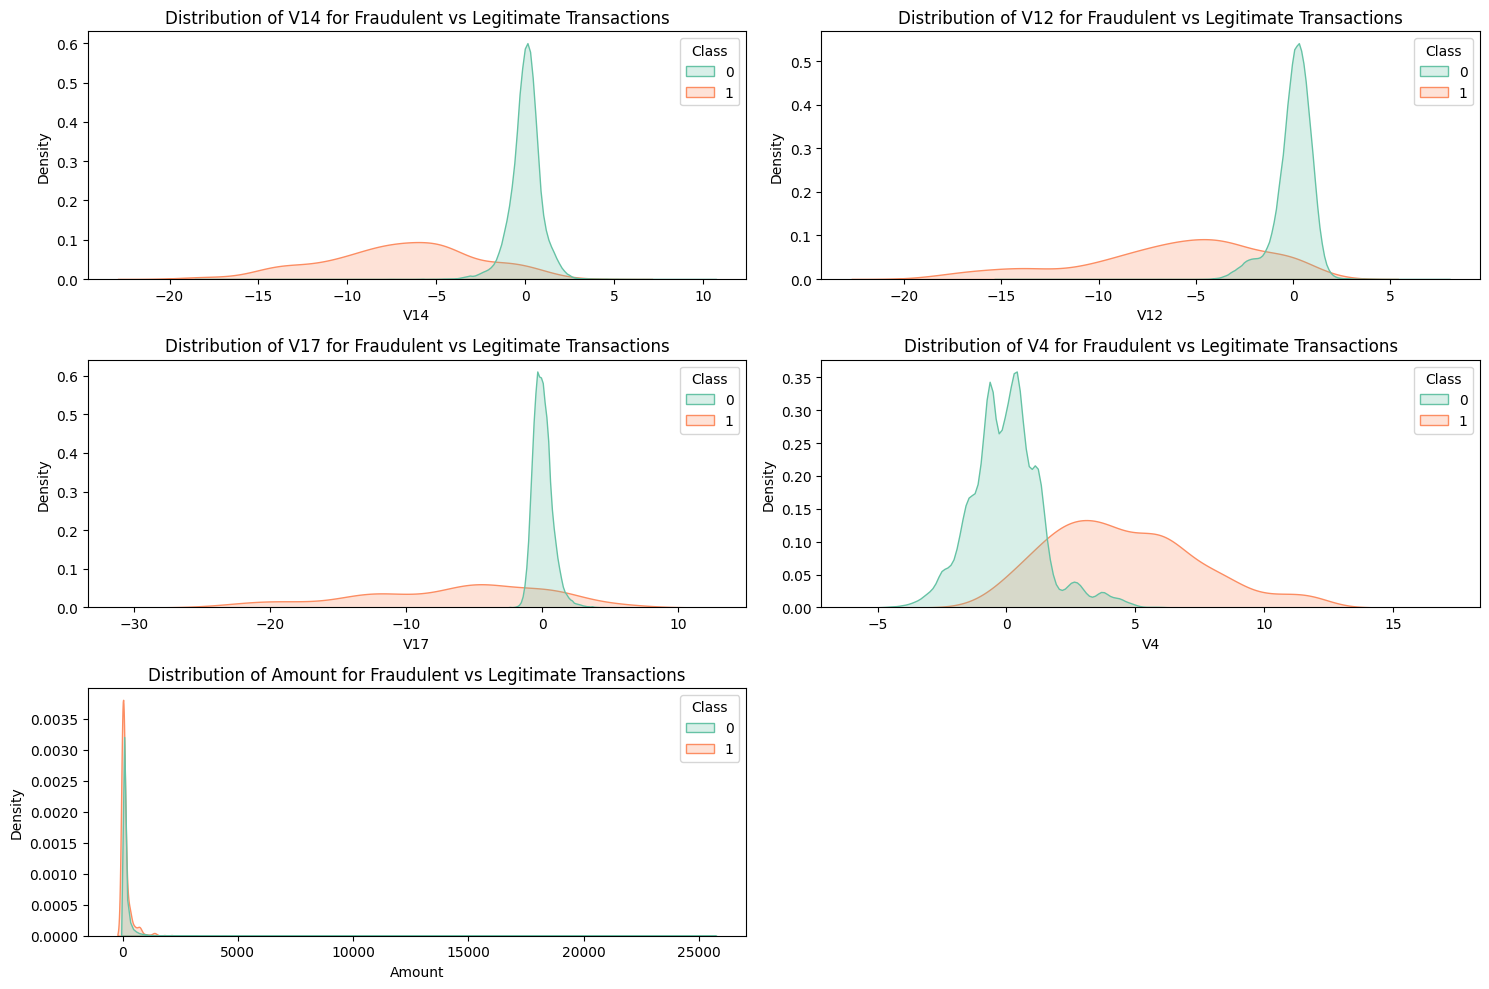

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few important features identified earlier
important_features = ['V14', 'V12', 'V17', 'V4', 'Amount']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True, palette='Set2', common_norm=False)
    plt.title(f"Distribution of {feature} for Fraudulent vs Legitimate Transactions")
plt.tight_layout()
plt.show()


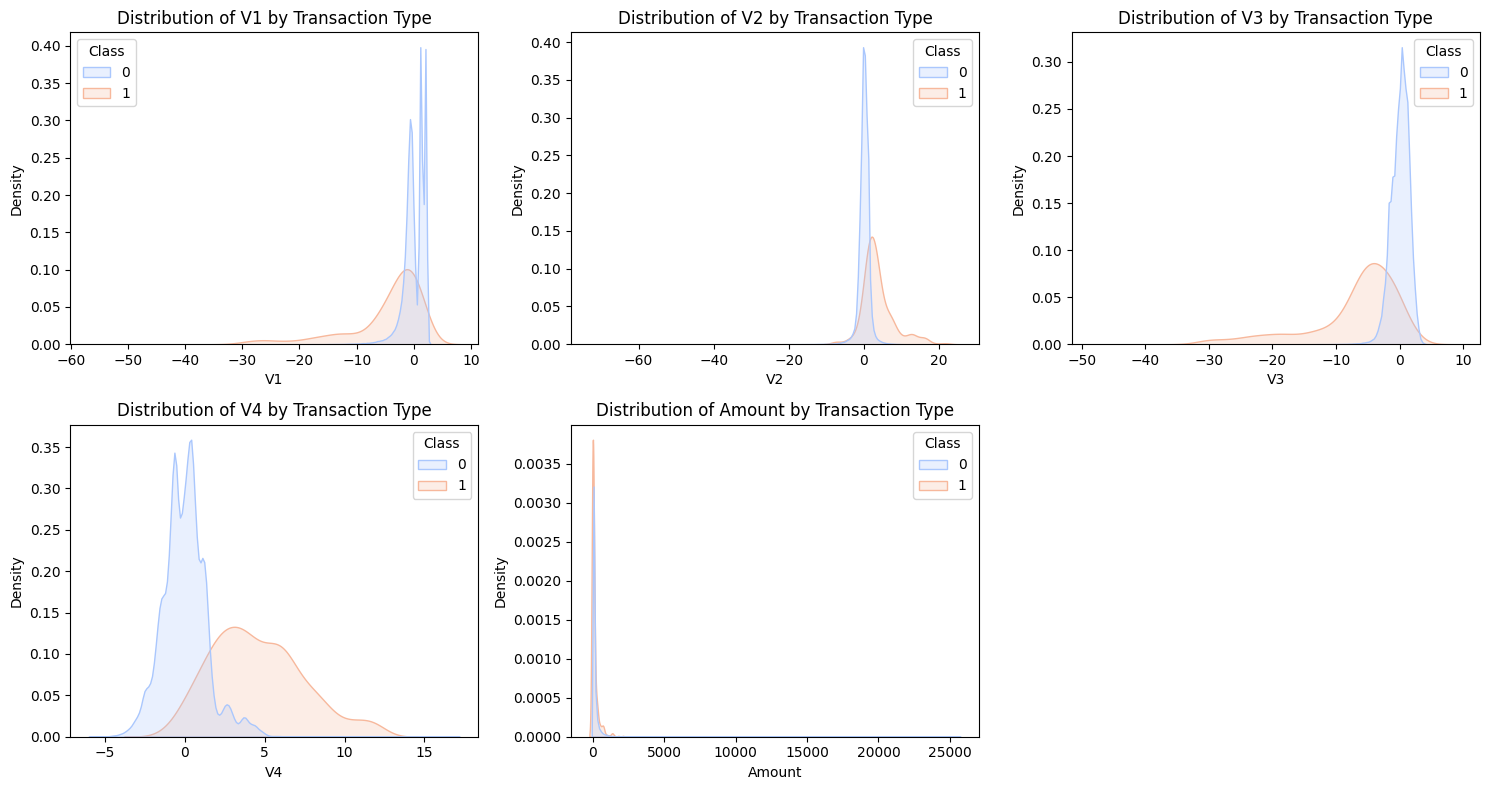

In [ ]:
# Example EDA visualization: distribution of a few top features
eda_features = ['V1', 'V2', 'V3', 'V4', 'Amount']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(eda_features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True, common_norm=False, palette='coolwarm')
    plt.title(f'Distribution of {feature} by Transaction Type')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1316048200.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(before_smote.keys()), y=list(before_smote.values()), palette='Blues')
/tmp/ipython-input-1316048200.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(after_smote.keys()), y=list(after_smote.values()), palette='Greens')


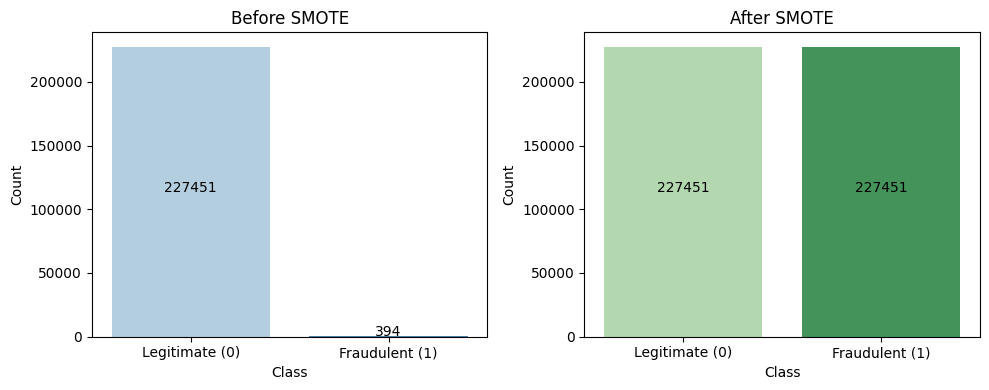

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Class distribution before SMOTE
before_smote = {0: 227451, 1: 394}
after_smote = {0: 227451, 1: 227451}


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=list(before_smote.keys()), y=list(before_smote.values()), palette='Blues')
plt.title("Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.text(0, before_smote[0]//2, f"{before_smote[0]}", ha='center', fontsize=10)
plt.text(1, before_smote[1]//2, f"{before_smote[1]}", ha='center', fontsize=10)

# Class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=list(after_smote.keys()), y=list(after_smote.values()), palette='Greens')
plt.title("After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.text(0, after_smote[0]//2, f"{after_smote[0]}", ha='center', fontsize=10)
plt.text(1, after_smote[1]//2, f"{after_smote[1]}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

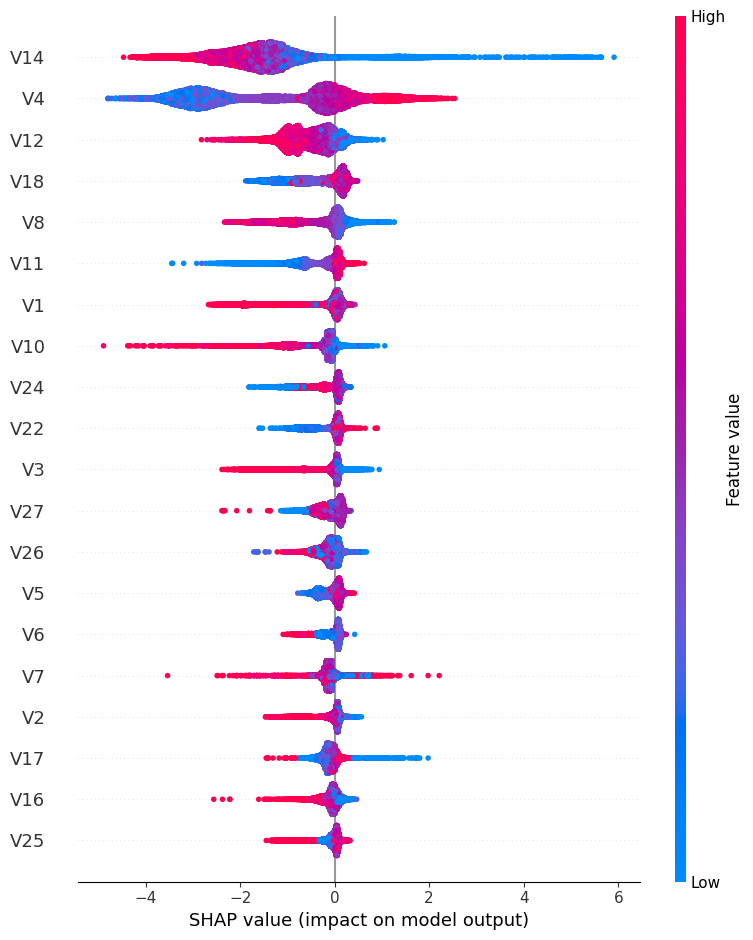

In [ ]:
import shap

# Create SHAP explainer for your trained model (assuming XGBoost)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="dot", show=True)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:06:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1 Accuracy: 0.9996


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:06:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2 Accuracy: 0.9995


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:06:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3 Accuracy: 0.9995


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:06:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4 Accuracy: 0.9994


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:07:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5 Accuracy: 0.9994


/tmp/ipython-input-3619764719.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"Fold {i+1}" for i in range(len(fold_accuracies))],


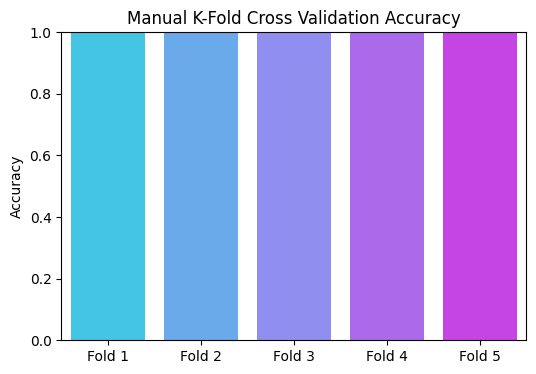


Mean Cross-Validation Accuracy: 0.9995


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Define Stratified KFold for imbalanced data
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train model
    model.fit(X_tr, y_tr)

    # Predict on validation fold
    y_pred_val = model.predict(X_val)

    # Calculate accuracy for this fold
    acc = accuracy_score(y_val, y_pred_val)
    fold_accuracies.append(acc)

    print(f"Fold {fold+1} Accuracy: {acc:.4f}")

#Plot Fold Accuracies
plt.figure(figsize=(6, 4))
sns.barplot(x=[f"Fold {i+1}" for i in range(len(fold_accuracies))],
            y=fold_accuracies, palette='cool')
plt.title("Manual K-Fold Cross Validation Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print(f"\nMean Cross-Validation Accuracy: {np.mean(fold_accuracies):.4f}")


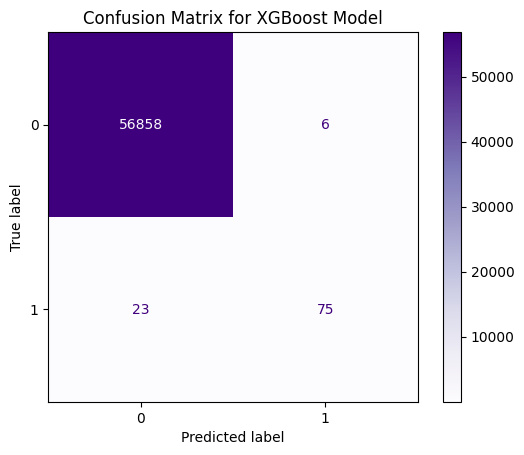

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Predict on test data
y_pred = model.predict(X_test)

#Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

#Print classification metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


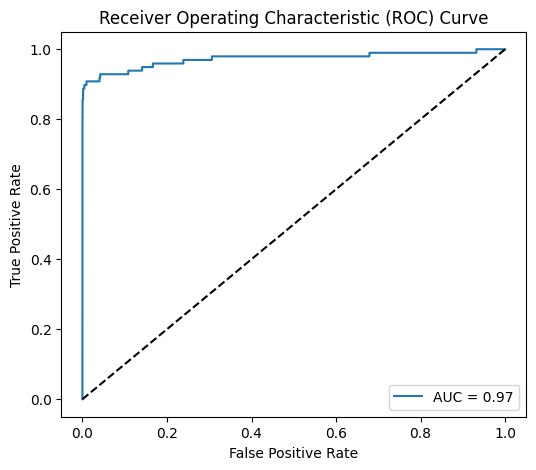

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56858     6]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



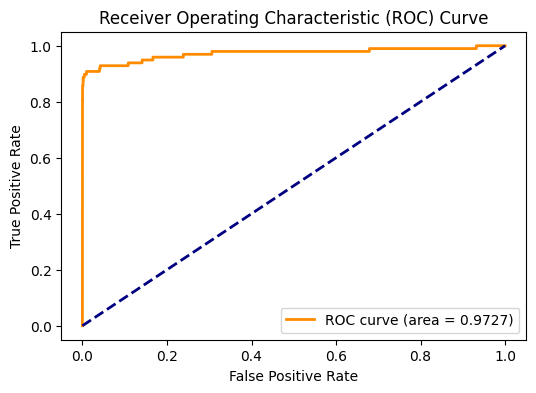

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


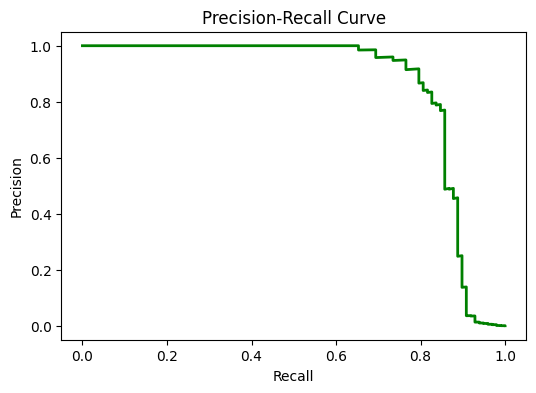

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
# Saving trained model
joblib.dump(model, "xgb_model.joblib")

# saving the scaler(scaled data)
joblib.dump(scaler, "scaler.pkl")

from google.colab import files
files.download("xgb_model.joblib")
files.download("scaler.pkl")